In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load sales data and promotion dates

sales_data = pd.read_csv("/Users/enginsan/coursera_files/semih/Assignment4.1a.csv")
promotion_data = pd.read_csv("/Users/enginsan/coursera_files/semih/Promotiondates.csv")

In [3]:
#check number of columns and rows
sales_data.shape

(1873618, 4)

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           object
 1   StoreCode      int64 
 2   ProductCode    int64 
 3   SalesQuantity  int64 
dtypes: int64(3), object(1)
memory usage: 57.2+ MB


In [5]:
# Convert Date column in sales data from object to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [6]:
sales_data.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [7]:
#create return data
return_data = sales_data[sales_data['SalesQuantity']<0]

In [8]:
return_data.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
159,2015-01-14,100,9,-1
353,2015-01-29,52,9,-1
912,2015-03-12,60,9,-1
936,2015-03-14,305,9,-1


In [9]:
# Handling negative sales values (returns)
#if it is negative make it 0, otherwise it takes its positive value
sales_data['SalesQuantity'] = sales_data['SalesQuantity'].apply(lambda x: max(x, 0))


In [10]:
sales_data.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,0
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [11]:
sales_data.tail()

,Date,StoreCode,ProductCode,SalesQuantity
1873613,2015-07-30,292,315,0
1873614,2015-07-31,12,315,1
1873615,2015-07-31,104,315,1
1873616,2015-07-31,261,315,1
1873617,2015-07-31,295,315,1


In [12]:
# Get unique stores and items
unique_store_items = sales_data[['StoreCode', 'ProductCode']].drop_duplicates()


In [13]:
unique_store_items.sort_values(by='StoreCode', ascending=True).head(20)

,StoreCode,ProductCode
708351,1,142
502117,1,99
1568007,1,249
498421,1,110
1570769,1,241
491985,1,157
481215,1,89
468166,1,186
1572818,1,257
1573271,1,295


In [14]:
unique_store_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83612 entries, 0 to 1873616
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   StoreCode    83612 non-null  int64
 1   ProductCode  83612 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [15]:
# Define the date range (assuming 2015-01-01 to 2015-07-31)
date_range = pd.date_range(start='2015-01-01', end='2015-07-31')



In [16]:
unique_store_count = unique_store_items['StoreCode'].nunique()
print("Number of unique stores:", unique_store_count)

Number of unique stores: 340


In [17]:
unique_items_count = unique_store_items['ProductCode'].nunique()
print("Number of unique products:", unique_items_count)

Number of unique products: 317


In [18]:
#sales_data_cleaned = unique_store_items.merge(sales_data, on=['StoreCode', 'ProductCode'], how='left')
sales_data=sales_data.drop_duplicates()
duplicates=sales_data.duplicated()
print(duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
1873613    False
1873614    False
1873615    False
1873616    False
1873617    False
Length: 1873618, dtype: bool


In [19]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   StoreCode      int64         
 2   ProductCode    int64         
 3   SalesQuantity  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 57.2 MB


In [20]:
#number of null values:
sales_data.isnull().sum()

Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

In [21]:
sales_data[["StoreCode", "ProductCode","SalesQuantity"]].describe().T.apply(lambda s: s.apply('{0:.2f}'.format))
#median value for sales is 1 and %75 of sale values is less than 2!
#max value is 912, it seems to be outliers in sales values...


,count,mean,std,min,25%,50%,75%,max
StoreCode,1873618.00,171.13,101.46,1.00,81.00,170.00,264.00,340.00
ProductCode,1873618.00,166.35,77.73,1.00,105.00,173.00,219.00,317.00
SalesQuantity,1873618.00,2.26,5.01,0.00,0.00,1.00,2.00,912.00


In [22]:
#value counts gives frequency for sales
sale_counts = sales_data["SalesQuantity"].value_counts(normalize=True).round(2).astype(str) + '%'
sale_counts.sort_values(ascending=False).head(20)
#sales more than 24 is rare!

SalesQuantity
1      0.38%
0      0.32%
2      0.13%
4      0.04%
3      0.04%
12     0.03%
24     0.01%
13     0.01%
6      0.01%
8      0.01%
5      0.01%
123     0.0%
125     0.0%
67      0.0%
82      0.0%
89      0.0%
100     0.0%
105     0.0%
102     0.0%
106     0.0%
Name: proportion, dtype: object

In [23]:
product_grouped_max = sales_data.groupby(['ProductCode'])['SalesQuantity'].max().sort_values(ascending=False)
print(product_grouped_max)
return_grouped_store_max = sales_data.groupby(['StoreCode'])['SalesQuantity'].max().sort_values(ascending=False)
print(return_grouped_store_max)

ProductCode
218    912
168    264
166    168
209    150
222    144
      ... 
310      0
160      0
165      0
182      0
183      0
Name: SalesQuantity, Length: 317, dtype: int64
StoreCode
256    912
117    264
135    230
62     209
238    194
      ... 
29      24
169      0
227      0
152      0
19       0
Name: SalesQuantity, Length: 340, dtype: int64


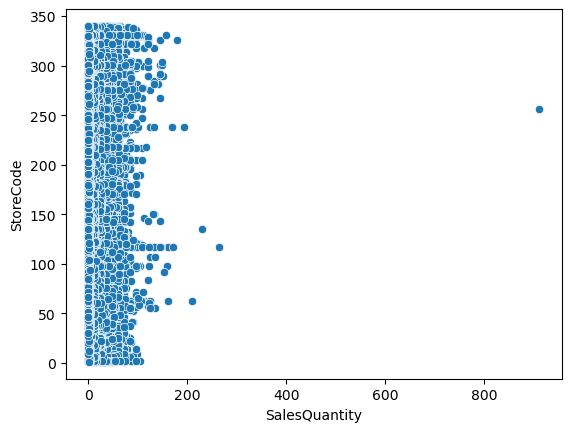

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=sales_data["SalesQuantity"],y=sales_data["StoreCode"],data=sales_data)
plt.show()

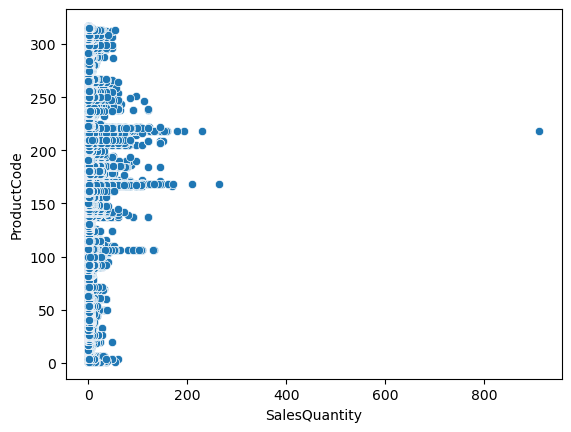

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=sales_data["SalesQuantity"],y=sales_data["ProductCode"],data=sales_data)
plt.show()

In [26]:
#Measures of Position and Dispersion
#import python libraries
from scipy.stats import iqr
import matplotlib.pyplot as plt

#Percentile Rank of the Sales Column in DataFrame
sales_data['Percentile_rank']=sales_data.SalesQuantity.rank(pct=True)
print("\n Values of Percentile Rank in the Distribution")
print("-------------------------------------------------")
print(sales_data.head(20))

print("\n Measures of Dispersion and Position in the Distribution")
print("--------------------------------------------------------------")

#Range of the Sales Column in Dataframe
r=max(sales_data["SalesQuantity"]) - min(sales_data["SalesQuantity"])
print("\n Value of Range in the Distribution = ", r)

#Standard Deviation of Sales Column in DataFrame
s=round(sales_data["SalesQuantity"].std(),3)
print("Value of Standard Deviation in the Distribution = ", s) 

#Variance of the Score Column1 in DataFrame
v=round(sales_data["SalesQuantity"].var(),3)
print("Value of Variance in the Distribution = ", v)

#Interquartile Range of Sale Column in DataFrame
i = iqr(sales_data["SalesQuantity"])
print("Value of Interquartile Range in the Distribution = ", i)



 Values of Percentile Rank in the Distribution
-------------------------------------------------
         Date  StoreCode  ProductCode  SalesQuantity  Percentile_rank
0  2015-01-01          8            9              0         0.160294
1  2015-01-01        131            9              1         0.509438
2  2015-01-01        144            9              2         0.761636
3  2015-01-01        203            9              2         0.761636
4  2015-01-01        256            9              0         0.160294
5  2015-01-01        273            9              1         0.509438
6  2015-01-02         12            9              0         0.160294
7  2015-01-02         52            9              1         0.509438
8  2015-01-02         65            9              1         0.509438
9  2015-01-02        118            9              1         0.509438
10 2015-01-02        173            9              1         0.509438
11 2015-01-02        177            9              1         0

In [27]:
#check weekly averages before removing extreme values

# Resample the grouped data on a weekly basis ('W') and sum 'SalesQuantity'
grouped_data = sales_data.groupby(['StoreCode', 'ProductCode'])

wk_sales = grouped_data.apply(lambda x: x.set_index('Date').resample('W')['SalesQuantity'].sum()).reset_index()
print(wk_sales.head())

#wk_sales = sales_data.groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].sum().reset_index()


   StoreCode  ProductCode       Date  SalesQuantity
0          1            1 2015-01-11              4
1          1            1 2015-01-18              0
2          1            1 2015-01-25              1
3          1            1 2015-02-01              0
4          1            1 2015-02-08              0


In [28]:
wk_sales['Week'] = wk_sales['Date'].dt.isocalendar().week


In [29]:
wk_sales.sort_values(by="SalesQuantity",ascending=False).head(20)

,StoreCode,ProductCode,Date,SalesQuantity,Week
1321736,256,218,2015-03-22,1163,12
520569,98,218,2015-03-22,518,12
621080,117,168,2015-04-05,490,14
1725315,331,218,2015-03-22,458,12
622386,117,218,2015-05-31,440,22
621082,117,168,2015-04-19,436,16
1582085,304,218,2015-03-22,428,12
621085,117,168,2015-05-10,411,19
1725329,331,218,2015-06-28,403,26
520562,98,218,2015-02-01,390,5


In [30]:
wk_sales[["SalesQuantity"]].describe().T.apply(lambda s: s.apply('{0:.4f}'.format))

,count,mean,std,min,25%,50%,75%,max
SalesQuantity,1778052.0000,2.3789,7.9502,0.0000,0.0000,0.0000,2.0000,1163.0000


In [31]:
wk_counts = wk_sales[["StoreCode","SalesQuantity"]].value_counts(normalize=True).round(4).astype(str) + '%'
wk_counts.sort_values(ascending=True).head(20)

StoreCode  SalesQuantity
302        30               0.0%
98         81               0.0%
           83               0.0%
111        34               0.0%
98         67               0.0%
           85               0.0%
111        25               0.0%
98         94               0.0%
           95               0.0%
110        61               0.0%
           60               0.0%
98         102              0.0%
           104              0.0%
           118              0.0%
110        30               0.0%
           29               0.0%
98         80               0.0%
           79               0.0%
112        23               0.0%
98         78               0.0%
Name: proportion, dtype: object

In [32]:
wk_counts2 = wk_sales[["SalesQuantity"]].value_counts(normalize=True).round(4).astype(str) + '%'
wk_counts2.sort_values(ascending=False).head(20)

SalesQuantity
0                 0.565%
1                0.1747%
2                 0.085%
3                0.0377%
4                0.0298%
5                0.0162%
12               0.0128%
6                0.0095%
8                0.0075%
13               0.0059%
7                0.0057%
14               0.0042%
10               0.0038%
9                0.0037%
16               0.0034%
15               0.0032%
24                0.003%
11                0.002%
17                0.002%
18               0.0016%
Name: proportion, dtype: object

<Axes: title={'center': 'SalesQuantity'}, xlabel='StoreCode'>

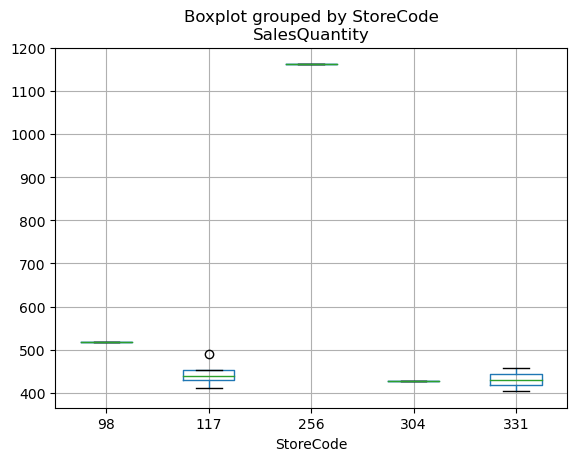

In [33]:
wk_sales[wk_sales['SalesQuantity']>400].boxplot(column = 'SalesQuantity', by = 'StoreCode')

In [34]:
promotion_data

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015
5,Promo6,20/11/2015,27/11/2015


#promotion 5 and 6 have incosistent day month values....it will be corrected when needed...

In [36]:
# Filter sales data to only include relevant promotions (first 4 promotions)
promotion_data_filtered = promotion_data.iloc[:4]

In [37]:
promotion_data_filtered

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015


In [38]:
promotion_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Period     4 non-null      object
 1   StartDate  4 non-null      object
 2   EndDate    4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [39]:
# Convert Date column in promotion data to datetime
promotion_data_filtered['StartDate'] = pd.to_datetime(promotion_data_filtered['StartDate'])
promotion_data_filtered['EndDate'] = pd.to_datetime(promotion_data_filtered['EndDate'])

/var/folders/_7/kc3rgw5x1ls2x8rgvb7qy6wc0000gn/T/ipykernel_1284/3424805025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promotion_data_filtered['StartDate'] = pd.to_datetime(promotion_data_filtered['StartDate'])
/var/folders/_7/kc3rgw5x1ls2x8rgvb7qy6wc0000gn/T/ipykernel_1284/3424805025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promotion_data_filtered['EndDate'] = pd.to_datetime(promotion_data_filtered['EndDate'])


In [40]:
# Creating a new feature for promotion periods (0 for non-promotion, 1 for promotion)

def promotion_period(date):
    date = pd.to_datetime(date)
    for _, promo in promotion_data_filtered.iterrows():
        if promo['StartDate'] <= date <= promo['EndDate']:
            return 1
    return 0
# Example date to check the fuction whether it works 
test_date = '2015-05-24'

# Test if this date falls within any promotion period
is_promo = promotion_period(test_date)
print(f'Is {test_date} in a promotion period? {is_promo}')

#new column 1s for promotion 0s for non-promotion
sales_data['PromotionFlag'] = sales_data['Date'].apply(promotion_period)


Is 2015-05-24 in a promotion period? 1


In [41]:
sales_data.head() 
#it takes some time to retrieve!

,Date,StoreCode,ProductCode,SalesQuantity,Percentile_rank,PromotionFlag
0,2015-01-01,8,9,0,0.160294,0
1,2015-01-01,131,9,1,0.509438,0
2,2015-01-01,144,9,2,0.761636,0
3,2015-01-01,203,9,2,0.761636,0
4,2015-01-01,256,9,0,0.160294,0


In [42]:
# Define non-promotion periods for clustering
# Creating mask to exclude promotion dates
non_promo_mask = ~(
    (sales_data['Date'].between(promotion_data_filtered.iloc[0]['StartDate'], promotion_data_filtered.iloc[0]['EndDate'])) |
    (sales_data['Date'].between(promotion_data_filtered.iloc[1]['StartDate'], promotion_data_filtered.iloc[1]['EndDate'])) |
    (sales_data['Date'].between(promotion_data_filtered.iloc[2]['StartDate'], promotion_data_filtered.iloc[2]['EndDate'])) |
    (sales_data['Date'].between(promotion_data_filtered.iloc[3]['StartDate'], promotion_data_filtered.iloc[3]['EndDate']))
)
non_promo_sales_data = sales_data[non_promo_mask]

In [43]:
#this is alternative sales_data[sales_data["PromotionFlag"]==0].head()

In [44]:
non_promo_sales_data.head()

,Date,StoreCode,ProductCode,SalesQuantity,Percentile_rank,PromotionFlag
0,2015-01-01,8,9,0,0.160294,0
1,2015-01-01,131,9,1,0.509438,0
2,2015-01-01,144,9,2,0.761636,0
3,2015-01-01,203,9,2,0.761636,0
4,2015-01-01,256,9,0,0.160294,0


In [45]:
# Calculate weekly average sales for each product-store during non-promotion periods
non_promo_sales_data['Week'] = non_promo_sales_data['Date'].dt.isocalendar().week
weekly_sales = non_promo_sales_data.groupby(['StoreCode', 'ProductCode', 'Week', 'PromotionFlag'])['SalesQuantity'].sum().reset_index()



/var/folders/_7/kc3rgw5x1ls2x8rgvb7qy6wc0000gn/T/ipykernel_1284/2101991954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promo_sales_data['Week'] = non_promo_sales_data['Date'].dt.isocalendar().week


In [46]:
#check weekly sales (without promotion)
weekly_sales.head()

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity
0,1,1,2,0,4
1,1,1,4,0,1
2,1,1,8,0,1
3,1,1,18,0,2
4,1,1,30,0,12


In [47]:
# Aggregate to get average weekly sales for clustering and column naming
#AvgWeeklySales is a name for nonpromotion period averages
avg_weekly_sales = weekly_sales.groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_sales.columns = ['StoreCode', 'ProductCode', 'AvgWeeklySales']


In [48]:
avg_weekly_sales.sort_values(by="AvgWeeklySales",ascending=False).round(2).head(20)

,StoreCode,ProductCode,AvgWeeklySales
28887,117,168,186.54
15306,62,168,176.64
24207,98,218,170.93
57441,238,218,163.61
80347,331,218,154.61
68038,281,168,147.54
73727,304,218,133.82
48108,198,218,125.22
72933,301,168,124.07
62364,258,218,120.77


In [96]:
#check store code 117:
avg_weekly_sales[avg_weekly_sales["StoreCode"]==117].sort_values(by="AvgWeeklySales",ascending=False).round(2).head(20)

,StoreCode,ProductCode,AvgWeeklySales
28887,117,168,186.54
28886,117,167,96.29
28885,117,166,85.36
28934,117,218,82.64
28889,117,170,41.11
28937,117,221,32.89
28938,117,222,30.96
28862,117,137,30.00
28921,117,205,29.46
28903,117,186,24.29


In [47]:
# Clustering products and stores into Fast, Medium, Slow categories
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
# Standardize the average weekly sales for clustering
#it controls the variability of the dataset, it convert data into specific 
#range using a linear transformation which generate good quality clusters and improve 
#the accuracy of clustering algorithms

scaler = StandardScaler()
avg_weekly_sales['ScaledSales'] = scaler.fit_transform(avg_weekly_sales[['AvgWeeklySales']])


In [49]:
# Products clustering with kmeans clustering method
product_avg_sales = avg_weekly_sales.groupby('ProductCode')['ScaledSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['ScaledSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})


/Users/enginsan/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [50]:
# Stores clustering
store_avg_sales = avg_weekly_sales.groupby('StoreCode')['ScaledSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['ScaledSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})


/Users/enginsan/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
# Output sample clustering results for products and stores seperately:
print(product_avg_sales.head())
print(store_avg_sales.head())

   ProductCode  ScaledSales Cluster
0            1     0.018786    Slow
1            2    -0.062213    Slow
2            3    -0.111663    Slow
3            4    -0.068620    Slow
4            5    -0.062464    Slow
   StoreCode  ScaledSales Cluster
0          1    -0.004719    Slow
1          2     0.645014    Fast
2          3    -0.085623  Medium
3          4     0.020073    Slow
4          5    -0.057987  Medium


In [52]:
store_avg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreCode    340 non-null    int64  
 1   ScaledSales  340 non-null    float64
 2   Cluster      340 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 8.1+ KB


In [53]:
store_avg_sales.sort_values(by='ScaledSales',ascending=False).round(2).head(20)

,StoreCode,ScaledSales,Cluster
330,331,0.81,Fast
1,2,0.65,Fast
275,276,0.63,Fast
59,60,0.58,Fast
280,281,0.56,Fast
97,98,0.56,Fast
61,62,0.56,Fast
116,117,0.53,Fast
300,301,0.52,Fast
237,238,0.47,Fast


In [54]:
#check fast store clusters with averages
store_avg_sales[store_avg_sales["Cluster"]=="Fast"].sort_values(by='ScaledSales',ascending=False).round(2)


,StoreCode,ScaledSales,Cluster
330,331,0.81,Fast
1,2,0.65,Fast
275,276,0.63,Fast
59,60,0.58,Fast
280,281,0.56,Fast
97,98,0.56,Fast
61,62,0.56,Fast
116,117,0.53,Fast
300,301,0.52,Fast
237,238,0.47,Fast


In [55]:
#to get classifications needed for labeling or merging 
class_data1=product_avg_sales[["ProductCode", "Cluster"]]
class_data1.head()

,ProductCode,Cluster
0,1,Slow
1,2,Slow
2,3,Slow
3,4,Slow
4,5,Slow


In [56]:
class_data2=store_avg_sales[["StoreCode", "Cluster"]]
class_data2.head()

,StoreCode,Cluster
0,1,Slow
1,2,Fast
2,3,Medium
3,4,Slow
4,5,Medium


In [57]:
class_data1.columns = ["ProductCode", "Prod_Cluster"]

In [58]:
class_data1.head()

,ProductCode,Prod_Cluster
0,1,Slow
1,2,Slow
2,3,Slow
3,4,Slow
4,5,Slow


In [59]:
class_data2.columns = ["StoreCode", "Store_Cluster"]
class_data2.head()

,StoreCode,Store_Cluster
0,1,Slow
1,2,Fast
2,3,Medium
3,4,Slow
4,5,Medium


In [60]:
#df_try1 = sales_data[sales_data['PromotionFlag']==1]
#df_try2 = df_try1.groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].mean().reset_index()
#df_try2.columns = ['StoreCode', 'ProductCode', 'AvgPromoSales']
#df_try2.head()
#df_try2.info()
#df_effect = avg_weekly_sales.merge(df_try2, on=['StoreCode', 'ProductCode'], how='left')
#df_effect['SalesIncrease'] = df_effect['AvgPromoSales'] - df_effect['AvgWeeklySales']


In [61]:
#df_effect.head()

In [62]:
# Define a function to measure sales increase during promotion periods
# AvgPromoSales will show averages in promotion periods
def calculate_promotion_effect(sales_data, promotion_period):
    promo_sales = sales_data[sales_data['PromotionFlag']==1]
    avg_promo_sales = promo_sales.groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].mean().reset_index()
    avg_promo_sales.columns = ['StoreCode', 'ProductCode', 'AvgPromoSales']
    
    # Merge with non-promotion weekly sales
    promo_effect = avg_weekly_sales.merge(avg_promo_sales, on=['StoreCode', 'ProductCode'], how='left')
    promo_effect['SalesIncrease'] = promo_effect['AvgPromoSales'] - promo_effect['AvgWeeklySales']
    return promo_effect


In [63]:
# Calculate promotion effects for first 4 promotions
promo_effects = []
for i in range(4):
    promo_effect = calculate_promotion_effect(sales_data, promotion_data_filtered.iloc[i])
    promo_effects.append(promo_effect)

In [64]:
# Combine all promotion effect DataFrames into one
promo_effects_df = pd.concat(promo_effects, keys=range(1, 5), names=['PromotionID']).reset_index(level=0)

# Rename the index column for clarity
promo_effects_df.rename(columns={'PromotionID': 'Promotion'}, inplace=True)

# Display the combined DataFrame
print(promo_effects_df.head())

   Promotion  StoreCode  ProductCode  AvgWeeklySales  ScaledSales  \
0          1          1            1        3.333333     0.157108   
1          1          1            2        1.875000    -0.129009   
2          1          1            3        1.812500    -0.141272   
3          1          1            4        1.181818    -0.265008   
4          1          1            5        1.375000    -0.227107   

   AvgPromoSales  SalesIncrease  
0            NaN            NaN  
1            1.0      -0.875000  
2            1.5      -0.312500  
3            1.0      -0.181818  
4            3.2       1.825000  


In [65]:
# Output example for the first promotion:
# Promotion column shows promotion numbers 1 to 4 such as promo1
promo_effects_df[promo_effects_df["Promotion"]==1].head()

,Promotion,StoreCode,ProductCode,AvgWeeklySales,ScaledSales,AvgPromoSales,SalesIncrease
0,1,1,1,3.333333,0.157108,NaN,NaN
1,1,1,2,1.875000,-0.129009,1.0,-0.875000
2,1,1,3,1.812500,-0.141272,1.5,-0.312500
3,1,1,4,1.181818,-0.265008,1.0,-0.181818
4,1,1,5,1.375000,-0.227107,3.2,1.825000


In [66]:
#merging with classification label from Product Cluster 
promo_effects_df1 = pd.merge(promo_effects_df, class_data1, on='ProductCode')

In [67]:
promo_effects_df1.head()

,Promotion,StoreCode,ProductCode,AvgWeeklySales,ScaledSales,AvgPromoSales,SalesIncrease,Prod_Cluster
0,1,1,1,3.333333,0.157108,NaN,NaN,Slow
1,1,2,1,2.437500,-0.018650,4.333333,1.895833,Slow
2,1,3,1,3.083333,0.108059,0.666667,-2.416667,Slow
3,1,4,1,2.400000,-0.026007,0.000000,-2.400000,Slow
4,1,5,1,1.800000,-0.143724,1.000000,-0.800000,Slow


In [68]:
#check Fast labelled products
promo_effects_df1[promo_effects_df1["Prod_Cluster"]=="Fast"].head()

,Promotion,StoreCode,ProductCode,AvgWeeklySales,ScaledSales,AvgPromoSales,SalesIncrease,Prod_Cluster
135540,1,1,137,30.000000,5.388967,NaN,NaN,Fast
135541,1,2,137,27.857143,4.968549,10.0,-17.857143,Fast
135542,1,3,137,6.000000,0.680294,0.0,-6.000000,Fast
135543,1,4,137,10.000000,1.465073,15.0,5.000000,Fast
135544,1,5,137,30.000000,5.388967,NaN,NaN,Fast


In [69]:
#check Slow labelled products
promo_effects_df1[promo_effects_df1["Prod_Cluster"]=="Slow"].head()

,Promotion,StoreCode,ProductCode,AvgWeeklySales,ScaledSales,AvgPromoSales,SalesIncrease,Prod_Cluster
0,1,1,1,3.333333,0.157108,NaN,NaN,Slow
1,1,2,1,2.437500,-0.018650,4.333333,1.895833,Slow
2,1,3,1,3.083333,0.108059,0.666667,-2.416667,Slow
3,1,4,1,2.400000,-0.026007,0.000000,-2.400000,Slow
4,1,5,1,1.800000,-0.143724,1.000000,-0.800000,Slow


In [70]:
#merge with Store cluster labels
promo_effects_final = pd.merge(promo_effects_df1, class_data2, on='StoreCode')

In [71]:
promo_effects_final.head(20)

,Promotion,StoreCode,ProductCode,AvgWeeklySales,ScaledSales,AvgPromoSales,SalesIncrease,Prod_Cluster,Store_Cluster
0,1,1,1,3.333333,0.157108,NaN,NaN,Slow,Slow
1,2,1,1,3.333333,0.157108,NaN,NaN,Slow,Slow
2,3,1,1,3.333333,0.157108,NaN,NaN,Slow,Slow
3,4,1,1,3.333333,0.157108,NaN,NaN,Slow,Slow
4,1,1,2,1.875000,-0.129009,1.0,-0.875000,Slow,Slow
5,2,1,2,1.875000,-0.129009,1.0,-0.875000,Slow,Slow
6,3,1,2,1.875000,-0.129009,1.0,-0.875000,Slow,Slow
7,4,1,2,1.875000,-0.129009,1.0,-0.875000,Slow,Slow
8,1,1,3,1.812500,-0.141272,1.5,-0.312500,Slow,Slow
9,2,1,3,1.812500,-0.141272,1.5,-0.312500,Slow,Slow


In [72]:
promo_effects_final[['ProductCode', 'StoreCode', 'SalesIncrease']].sort_values(by='SalesIncrease', ascending=False).head(10)

,ProductCode,StoreCode,SalesIncrease
83850,218,92,120.200000
83849,218,92,120.200000
83848,218,92,120.200000
83851,218,92,120.200000
285386,137,328,111.428571
285384,137,328,111.428571
285385,137,328,111.428571
285387,137,328,111.428571
83861,221,92,68.200000
83862,221,92,68.200000


In [73]:
df1_deneme = promo_effects_final.groupby('StoreCode')['AvgPromoSales'].mean().sort_values(ascending=False).reset_index()
print(df1_deneme.head())
df2_deneme = promo_effects_final.groupby('StoreCode')['AvgWeeklySales'].mean().sort_values(ascending=False).reset_index()
print(df2_deneme.head())
df_compare = df1_deneme.merge(df2_deneme, on='StoreCode', how='left')
df_compare.head()
df_compare['Diff']=df_compare['AvgPromoSales']-df_compare['AvgWeeklySales']
df_compare.head()
df_compare[df_compare['Diff']>0].sort_values(by='Diff', ascending=False).head(100)

   StoreCode  AvgPromoSales
0         92       6.071429
1         57       2.945607
2        275       2.842689
3        117       2.796696
4        301       2.745242
   StoreCode  AvgWeeklySales
0        331        6.676690
1          2        5.820181
2        276        5.763442
3         60        5.488911
4        281        5.411915


,StoreCode,AvgPromoSales,AvgWeeklySales,Diff
0,92,6.071429,3.075523,2.995905
330,29,1.085859,0.520700,0.565159
55,143,2.147095,1.754537,0.392558
100,173,1.948572,1.623632,0.324940
53,43,2.149974,1.961060,0.188914
125,257,1.873034,1.715133,0.157901
66,180,2.098475,1.952879,0.145596
84,140,2.014289,1.872673,0.141616
206,102,1.651235,1.514380,0.136855
133,82,1.862100,1.748049,0.114051


In [74]:
df3=promo_effects_final[(promo_effects_final["Store_Cluster"]=="Fast")&(promo_effects_final["Prod_Cluster"]=="Slow")&(promo_effects_final["SalesIncrease"]>0)]

In [75]:
df3.sort_values(by="SalesIncrease",ascending=False)
df3.describe()

,Promotion,StoreCode,ProductCode,AvgWeeklySales,ScaledSales,AvgPromoSales,SalesIncrease
count,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000
mean,2.500000,206.874332,148.448307,1.337487,-0.234467,2.492814,1.155327
std,1.118159,92.847883,97.963973,1.289807,0.253053,2.454908,1.764724
min,1.000000,2.000000,1.000000,0.000000,-0.496874,0.333333,0.004831
25%,1.750000,117.000000,65.000000,0.466667,-0.405317,1.000000,0.250000
50%,2.500000,236.000000,127.000000,0.857143,-0.328708,1.500000,0.548810
75%,3.250000,281.000000,247.000000,1.800000,-0.143724,3.333333,1.216667
max,4.000000,333.000000,317.000000,9.500000,1.366975,20.166667,14.222222


In [76]:
df4=promo_effects_final[(promo_effects_final["Store_Cluster"]=="Slow")&(promo_effects_final["Prod_Cluster"]=="Fast")&(promo_effects_final["SalesIncrease"]>0)]

In [77]:
df4.describe()

,Promotion,StoreCode,ProductCode,AvgWeeklySales,ScaledSales,AvgPromoSales,SalesIncrease
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.500000,156.875000,156.750000,10.062031,1.477243,28.210493,18.148462
std,1.122427,101.577091,27.423767,7.435510,1.458808,28.228575,24.817758
min,1.000000,4.000000,137.000000,0.000000,-0.496874,6.142857,0.248677
25%,1.750000,92.000000,137.000000,5.777778,0.636695,14.250000,2.369281
50%,2.500000,133.000000,137.000000,7.601852,0.994569,21.250000,7.500000
75%,3.250000,227.500000,167.250000,12.575000,1.970274,30.000000,24.600000
max,4.000000,340.000000,221.000000,32.800000,5.938312,153.000000,120.200000


In [78]:
biggest_increase_items = promo_effects_final.groupby(['ProductCode', 'Prod_Cluster'])['SalesIncrease'].max().sort_values(ascending=False)
biggest_increase_stores = promo_effects_final.groupby(['StoreCode', 'Store_Cluster'])['SalesIncrease'].max().sort_values(ascending=False)

# Display the top 10 items and stores with the biggest sales increase
top_10_increase_items = biggest_increase_items.head(10)
top_10_increase_stores = biggest_increase_stores.head(10)

print("Top 10 Items with Biggest Increase:")
print(top_10_increase_items)

print("Top 10 Stores with Biggest Increase:")
print(top_10_increase_stores)

Top 10 Items with Biggest Increase:
ProductCode  Prod_Cluster
218          Fast            120.200000
137          Fast            111.428571
221          Fast             68.200000
239          Medium           60.000000
238          Medium           50.000000
296          Slow             47.000000
168          Fast             41.200000
139          Medium           40.000000
247          Slow             34.500000
184          Medium           33.200000
Name: SalesIncrease, dtype: float64
Top 10 Stores with Biggest Increase:
StoreCode  Store_Cluster
92         Slow             120.200000
328        Medium           111.428571
84         Slow              60.000000
32         Medium            60.000000
127        Slow              55.000000
320        Medium            50.000000
114        Medium            49.000000
275        Fast              48.500000
124        Medium            47.236842
73         Medium            47.000000
Name: SalesIncrease, dtype: float64


In [79]:
non_prom_slow_items_means= promo_effects_final[promo_effects_final['Prod_Cluster']=="Slow"]
non_prom_slow_items_means = non_prom_slow_items_means.groupby(['Prod_Cluster'])['AvgWeeklySales'].mean().reset_index()
non_prom_slow_items_means.head()

,Prod_Cluster,AvgWeeklySales
0,Slow,1.448233


In [80]:
prom_slow_items_means= promo_effects_final[promo_effects_final['Prod_Cluster']=="Slow"]
prom_slow_items_means = prom_slow_items_means.groupby('Prod_Cluster')['AvgPromoSales'].mean().reset_index()
prom_slow_items_means.head()

,Prod_Cluster,AvgPromoSales
0,Slow,1.214946


In [81]:
non_prom_fast_items_means= promo_effects_final[promo_effects_final['Prod_Cluster']=="Fast"]
non_prom_fast_items_means = non_prom_fast_items_means.groupby(['Prod_Cluster'])['AvgWeeklySales'].mean().reset_index()
non_prom_fast_items_means.head()

,Prod_Cluster,AvgWeeklySales
0,Fast,20.51727


In [82]:
prom_fast_items_means= promo_effects_final[promo_effects_final['Prod_Cluster']=="Fast"]
prom_fast_items_means = prom_fast_items_means.groupby(['Prod_Cluster'])['AvgPromoSales'].mean().reset_index()
prom_fast_items_means.head()

,Prod_Cluster,AvgPromoSales
0,Fast,8.787074


In [83]:
non_prom_slow_store_means= promo_effects_final[promo_effects_final['Store_Cluster']=="Slow"]
non_prom_slow_store_means = non_prom_slow_store_means.groupby(['Store_Cluster'])['AvgWeeklySales'].mean().reset_index()
non_prom_slow_store_means.head()

,Store_Cluster,AvgWeeklySales
0,Slow,2.966148


In [84]:
prom_slow_store_means= promo_effects_final[promo_effects_final['Store_Cluster']=="Slow"]
prom_slow_store_means = prom_slow_store_means.groupby(['Store_Cluster'])['AvgPromoSales'].mean().reset_index()
prom_slow_store_means.head()

,Store_Cluster,AvgPromoSales
0,Slow,1.975635


In [85]:
non_prom_fast_store_means= promo_effects_final[promo_effects_final['Store_Cluster']=="Fast"]
non_prom_fast_store_means = non_prom_fast_store_means.groupby(['Store_Cluster'])['AvgWeeklySales'].mean().reset_index()
non_prom_fast_store_means.head()

,Store_Cluster,AvgWeeklySales
0,Fast,4.712082


In [86]:
prom_fast_store_means= promo_effects_final[promo_effects_final['Store_Cluster']=="Fast"]
prom_fast_store_means = prom_fast_store_means.groupby(['Store_Cluster'])['AvgPromoSales'].mean().reset_index()
prom_fast_store_means.head()

,Store_Cluster,AvgPromoSales
0,Fast,2.407409


In [87]:
#MODELING 

In [88]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [89]:
#reading data 4.1.b and naming as sales_data_future
sales_data_future = pd.read_csv('/Users/enginsan/coursera_files/semih/Assignment4.1b.csv')

In [90]:
sales_data_future.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1


In [91]:
sales_data.head()

,Date,StoreCode,ProductCode,SalesQuantity,Percentile_rank,PromotionFlag
0,2015-01-01,8,9,0,0.160294,0
1,2015-01-01,131,9,1,0.509438,0
2,2015-01-01,144,9,2,0.761636,0
3,2015-01-01,203,9,2,0.761636,0
4,2015-01-01,256,9,0,0.160294,0


In [92]:
#drop Percentile_rank column
sales_data = sales_data.drop('Percentile_rank', axis=1)
#to check promotionflag and filtering data
sales_data[sales_data['PromotionFlag']==1].head() 

,Date,StoreCode,ProductCode,SalesQuantity,PromotionFlag
507,2015-02-10,6,9,0,1
508,2015-02-10,14,9,0,1
509,2015-02-10,28,9,0,1
510,2015-02-10,45,9,1,1
511,2015-02-10,47,9,1,1


In [93]:
# Aggregate data: weekly sales for each store-production combination
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
weekly_sales_model = sales_data.groupby(['StoreCode', 'ProductCode', 'Week', 'PromotionFlag'])['SalesQuantity'].sum().reset_index()

weekly_sales_model.head()

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity
0,1,1,2,0,4
1,1,1,4,0,1
2,1,1,8,0,1
3,1,1,18,0,2
4,1,1,30,0,12


In [94]:
#to check promotionflag and filtering data
weekly_sales_model[weekly_sales_model['PromotionFlag']==1].head() 

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity
7,1,2,7,1,2
14,1,2,21,1,0
19,1,3,7,1,3
21,1,3,8,1,1
24,1,3,11,1,1


In [95]:
# Merge weekly sales with clusters data for items and stores from earlier step (I have store_avg_sales and product_avg_sales from previous clustering)
weekly_sales_model = weekly_sales_model.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
weekly_sales_model = weekly_sales_model.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')

weekly_sales_model.head()

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity,Cluster_x,Cluster_y
0,1,1,2,0,4,Slow,Slow
1,1,1,4,0,1,Slow,Slow
2,1,1,8,0,1,Slow,Slow
3,1,1,18,0,2,Slow,Slow
4,1,1,30,0,12,Slow,Slow


In [96]:
# Convert categorical clusters to numerical values for the model and rename cluster label columns
weekly_sales_model['ProductCluster'] = weekly_sales_model['Cluster_x'].map({'Slow': 0, 'Medium': 1, 'Fast': 2})
weekly_sales_model['StoreCluster'] = weekly_sales_model['Cluster_y'].map({'Slow': 0, 'Medium': 1, 'Fast': 2})
weekly_sales_model.drop(['Cluster_x', 'Cluster_y'], axis=1, inplace=True)
weekly_sales_model.head()

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity,ProductCluster,StoreCluster
0,1,1,2,0,4,0.0,0
1,1,1,4,0,1,0.0,0
2,1,1,8,0,1,0.0,0
3,1,1,18,0,2,0.0,0
4,1,1,30,0,12,0.0,0


In [97]:
#check for Fast (numerically labeled as 2) products in promotion period
weekly_sales_model[(weekly_sales_model['ProductCluster']==2) & (weekly_sales_model['PromotionFlag']==1)]

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity,ProductCluster,StoreCluster
1786,1,166,7,1,12,2.0,0
1787,1,166,8,1,0,2.0,0
1791,1,166,12,1,8,2.0,0
1801,1,166,21,1,0,2.0,0
1802,1,166,22,1,16,2.0,0
...,...,...,...,...,...,...,...
1099410,340,221,12,1,2,2.0,0
1099420,340,221,21,1,2,2.0,0
1099421,340,221,22,1,14,2.0,0
1099425,340,221,25,1,12,2.0,0


In [98]:
# Preparing features combined in (X) and target variable (y) for the model
X = weekly_sales_model[['PromotionFlag', 'ProductCluster', 'StoreCluster', 'Week']]
y = weekly_sales_model['SalesQuantity']

In [99]:
#check feature data for counts of columns and numericals
X.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
PromotionFlag,1100467.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
ProductCluster,1100466.00,0.29,0.55,0.00,0.00,0.00,0.00,2.00
StoreCluster,1100467.00,0.80,0.63,0.00,0.00,1.00,1.00,2.00
Week,1100467.00,15.86,8.56,1.00,8.00,16.00,23.00,31.00


In [100]:
#check number of null values in Features data:
X.isnull().sum()

PromotionFlag     0
ProductCluster    1
StoreCluster      0
Week              0
dtype: int64

In [101]:
#replace this only one null value in ProductCluster with value 0 (will not change results, ignorable)
X['ProductCluster'] = X['ProductCluster'].fillna(0)

/var/folders/_7/kc3rgw5x1ls2x8rgvb7qy6wc0000gn/T/ipykernel_12431/223169618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ProductCluster'] = X['ProductCluster'].fillna(0)


In [102]:
X.isnull().sum()
print(len(X))

1100467


In [103]:
#number of null values and length in TARGET data:
y.isnull().sum()
print(len(y))

1100467


In [104]:
# Split the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

	•	y_pred represents the model’s best estimate of the target variable based on patterns it learned from the training data (X_train, y_train).
	•	Comparing y_pred with the actual values in y_test will allow you to evaluate the model’s accuracy, often using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared.

By analyzing y_pred, you gain insight into how well the Random Forest model generalizes to new, unseen data (i.e., X_test), allowing you to assess its predictive power for future sales or other outcomes.


In [107]:
# Add X_test features to the comparison DataFrame
comparison_df = pd.concat([X_test, pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})], axis=1)

# Display the first few rows
print(comparison_df.head())

        PromotionFlag  ProductCluster  StoreCluster  Week  Actual  Predicted
882883              0             0.0             1    24       2   1.602775
720770              0             0.0             1    28       0   1.590543
321739              0             0.0             1     5       2   1.492760
586379              0             0.0             1    25       1   1.543276
326636              0             0.0             2    10       2   3.108548


In [108]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 7.653265444193142


In [109]:
predict_bystores_cluster=comparison_df.groupby('StoreCluster')['Predicted'].mean().reset_index()
actual_bystores_cluster=comparison_df.groupby('StoreCluster')['Actual'].mean().reset_index()
print(predict_bystores_cluster)
print(actual_bystores_cluster)

   StoreCluster  Predicted
0             0   4.332735
1             1   2.925423
2             2   6.918947
   StoreCluster    Actual
0             0  4.375899
1             1  2.916758
2             2  7.006279


In [110]:
predict_byitem_cluster=comparison_df.groupby('ProductCluster')['Predicted'].mean().reset_index()
actual_byitem_cluster=comparison_df.groupby('ProductCluster')['Actual'].mean().reset_index()
print(predict_byitem_cluster)
print(actual_byitem_cluster)

   ProductCluster  Predicted
0             0.0   1.875269
1             1.0   7.033416
2             2.0  22.466569
   ProductCluster     Actual
0             0.0   1.872049
1             1.0   7.131842
2             2.0  22.528350


•	Scale Dependence: RMSE is on the same scale as your target variable, which means that, on average, predictions deviate from actual sales by about 7.75 units.
•	Error Assessment: Whether this RMSE is acceptable depends on the range of sales data. For example, if typical sales are much higher, say in the hundreds, then this error might be relatively small. However, if average sales are lower, say around 10-20 units, this error could be significant.
Improving the Model

If the RMSE is larger than desired, here are some steps you might take:

1.	Feature Engineering: Add features like lagged sales, store and product clusters, or time-based features (e.g., day of the week, month).
2.	Hyperparameter Tuning: Experiment with hyperparameters of your random forest model. Using cross-validation or a grid search can help optimize the model.
3.	Data Clustering: Since you’re grouping items and stores into clusters (e.g., Fast, Medium, Slow), test if these clusters improve model performance when added as features.
4.	Addressing Outliers: If there are extreme sales values due to promotions, these could influence RMSE. Consider using transformations or treating outliers.

In [112]:
#FUTURE DATA 4.1.B AND PROMOTION 5

In [113]:
sales_data_future=sales_data_future[sales_data_future["SalesQuantity"]>=0]

In [114]:
sales_data_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023237 entries, 0 to 1028120
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Date           1023237 non-null  object
 1   StoreCode      1023237 non-null  int64 
 2   ProductCode    1023237 non-null  int64 
 3   SalesQuantity  1023237 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 39.0+ MB


In [115]:
# Convert Date column in sales data from object to datetime
sales_data_future['Date'] = pd.to_datetime(sales_data_future['Date'])

In [116]:
# Initialize the column with 0s
# date range promo5
start_date = '2015-09-01'  
end_date = '2015-09-06'    

sales_data_future['PromotionFlag'] = 0

# Set rows to 1 where the date is within the range
sales_data_future.loc[(sales_data_future['Date'] >= start_date) & (sales_data_future['Date'] <= end_date), 'PromotionFlag'] = 1

In [117]:
sales_data_future[sales_data_future["PromotionFlag"]==1].head()

,Date,StoreCode,ProductCode,SalesQuantity,PromotionFlag
233877,2015-09-01,1,25,1,1
233878,2015-09-01,1,37,1,1
233879,2015-09-01,1,38,1,1
233880,2015-09-01,1,46,1,1
233881,2015-09-01,1,71,2,1


In [118]:
sales_data_future['Week'] = sales_data_future['Date'].dt.isocalendar().week
weekly_future_sales = sales_data_future.groupby(['StoreCode', 'ProductCode', 'Week', 'PromotionFlag'])['SalesQuantity'].sum().reset_index()
weekly_future_sales.head()

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity
0,1,1,32,0,1
1,1,1,33,0,1
2,1,1,34,0,1
3,1,1,35,0,1
4,1,1,36,1,2


In [119]:
# Merge future data with cluster info from previously done
weekly_future_sales = weekly_future_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
weekly_future_sales = weekly_future_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')


In [120]:
# Map clusters to numeric as previously done
weekly_future_sales['ProductCluster'] = weekly_future_sales['Cluster_x'].map({'Slow': 0, 'Medium': 1, 'Fast': 2})
weekly_future_sales['StoreCluster'] = weekly_future_sales['Cluster_y'].map({'Slow': 0, 'Medium': 1, 'Fast': 2})
weekly_future_sales.drop(['Cluster_x', 'Cluster_y'], axis=1, inplace=True)
weekly_future_sales.head()

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity,ProductCluster,StoreCluster
0,1,1,32,0,1,0,0
1,1,1,33,0,1,0,0
2,1,1,34,0,1,0,0
3,1,1,35,0,1,0,0
4,1,1,36,1,2,0,0


In [121]:
#create dataframe with promotion 5 by filtering future data 
weekly_future_sales_promotion = weekly_future_sales[weekly_future_sales["PromotionFlag"]==1]
weekly_future_sales_promotion.head()

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity,ProductCluster,StoreCluster
4,1,1,36,1,2,0,0
7,1,2,36,1,1,0,0
11,1,5,36,1,1,0,0
37,1,7,36,1,0,0,0
85,1,23,36,1,1,0,0


In [122]:
# Predict sales during Promotion 5
X_future = weekly_future_sales_promotion[['PromotionFlag', 'ProductCluster', 'StoreCluster', 'Week']]
weekly_future_sales_promotion['PredictedSales'] = rf_model.predict(X_future)


/var/folders/_7/kc3rgw5x1ls2x8rgvb7qy6wc0000gn/T/ipykernel_12431/3420088915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_future_sales_promotion['PredictedSales'] = rf_model.predict(X_future)


In [123]:
weekly_future_sales_promotion.head(10)

,StoreCode,ProductCode,Week,PromotionFlag,SalesQuantity,ProductCluster,StoreCluster,PredictedSales
4,1,1,36,1,2,0,0,1.794053
7,1,2,36,1,1,0,0,1.794053
11,1,5,36,1,1,0,0,1.794053
37,1,7,36,1,0,0,0,1.794053
85,1,23,36,1,1,0,0,1.794053
95,1,24,36,1,2,0,0,1.794053
108,1,25,36,1,1,0,0,1.794053
147,1,37,36,1,1,0,0,1.794053
164,1,38,36,1,1,0,0,1.794053
183,1,39,36,1,4,0,0,1.794053


In [124]:
y_act = weekly_future_sales_promotion['SalesQuantity']
y_predicted=weekly_future_sales_promotion['PredictedSales']

In [125]:
# Add X_test features to the comparison DataFrame
comparison_future = pd.concat([X_future, pd.DataFrame({'Actual': y_act, 'Predicted': y_predicted})], axis=1)

# Display the first few rows
print(comparison_future.head())

    PromotionFlag  ProductCluster  StoreCluster  Week  Actual  Predicted
4               1               0             0    36       2   1.794053
7               1               0             0    36       1   1.794053
11              1               0             0    36       1   1.794053
37              1               0             0    36       0   1.794053
85              1               0             0    36       1   1.794053


In [126]:
pred_mean_bystores_cluster=weekly_future_sales_promotion.groupby('StoreCluster')['PredictedSales'].mean().reset_index()


In [127]:
pred_mean_bystores_cluster.head()

,StoreCluster,PredictedSales
0,0,3.937361
1,1,2.514732
2,2,6.764612


In [128]:
actual_mean_bystores_cluster=weekly_future_sales_promotion.groupby('StoreCluster')['SalesQuantity'].mean().reset_index()


In [129]:
actual_mean_bystores_cluster.head()

,StoreCluster,SalesQuantity
0,0,4.889802
1,1,3.182760
2,2,6.703224


In [130]:
pred_mean_byitems_cluster=weekly_future_sales_promotion.groupby('ProductCluster')['PredictedSales'].mean().reset_index()
actual_mean_byitems_cluster=weekly_future_sales_promotion.groupby('ProductCluster')['SalesQuantity'].mean().reset_index()
print(pred_mean_byitems_cluster)
print(actual_mean_byitems_cluster)

   ProductCluster  PredictedSales
0               0        1.548892
1               1        6.366752
2               2       22.707106
   ProductCluster  SalesQuantity
0               0       2.129675
1               1       7.874003
2               2      21.747093
